In [1]:
import pandas as pd
import os

# --- CONFIGURATION (UPDATE THESE PATHS!) ---
# Copy these from your Kaggle Input sidebar
LABEL_PATH = '/kaggle/input/oasis3-clinical-data/OASIS3_data_files/scans/UDSb4-Form_B4__Global_Staging__CDR__Standard_and_Supplemental/resources/csv/files/OASIS3_UDSb4_cdr.csv'          
DEMO_PATH  = '/kaggle/input/oasis3-clinical-data/OASIS3_data_files/scans/demo-demographics/resources/csv/files/OASIS3_demographics.csv'          
PSYCH_PATH = '/kaggle/input/oasis3-clinical-data/OASIS3_data_files/scans/pychometrics-Form_C1__Cognitive_Assessments/resources/csv/files/OASIS3_UDSc1_cognitive_assessments.csv'

print("📊 Loading Clinical Files...")
label_df = pd.read_csv(LABEL_PATH)
demo_df = pd.read_csv(DEMO_PATH)

# --- 1. RENAME COLUMNS (Standardizing) ---
# We map the specific column names from your files to standard ones
label_df = label_df.rename(columns={
    'CDRTOT': 'CDR',      # Clinical Dementia Rating (Global)
    'MMSE': 'MMSE'        # Mini-Mental State Exam (Found here!)
})

demo_df = demo_df.rename(columns={
    'AgeatEntry': 'Age',  # Fix case sensitivity
    'GENDER': 'Gender'    # Fix uppercase
})

print("✅ Columns Renamed Successfully.")

# --- 2. MERGE (The Fusion) ---
print("🔗 Merging Labels + Demographics...")
# We merge on 'OASISID'
final_df = pd.merge(label_df[['OASISID', 'CDR', 'MMSE']],
                    demo_df[['OASISID', 'Age', 'Gender']],
                    on='OASISID',
                    how='inner')

# Drop rows where critical data is missing (NaN)
final_df = final_df.dropna()

# --- 3. SAVE ---
final_df.to_csv('OASIS3_Master_Clinical.csv', index=False)

print(f"✅ SUCCESS! Master CSV created with {len(final_df)} patients.")
print("   Saved to: /kaggle/working/OASIS3_Master_Clinical.csv")
print(final_df.head())

📊 Loading Clinical Files...
✅ Columns Renamed Successfully.
🔗 Merging Labels + Demographics...
✅ SUCCESS! Master CSV created with 7593 patients.
   Saved to: /kaggle/working/OASIS3_Master_Clinical.csv
    OASISID  CDR  MMSE      Age  Gender
0  OAS30001  0.0  28.0  65.1945       2
1  OAS30001  0.0  28.0  65.1945       2
2  OAS30001  0.0  30.0  65.1945       2
3  OAS30001  0.0  30.0  65.1945       2
4  OAS30001  0.0  30.0  65.1945       2


📊 Loading Data for Analysis...

--- Class Balance ---
CDR
0.0    5680
0.5    1319
1.0     470
2.0     115
3.0       9
Name: count, dtype: int64


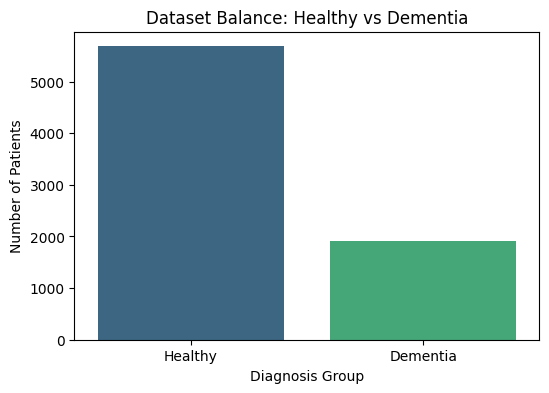

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

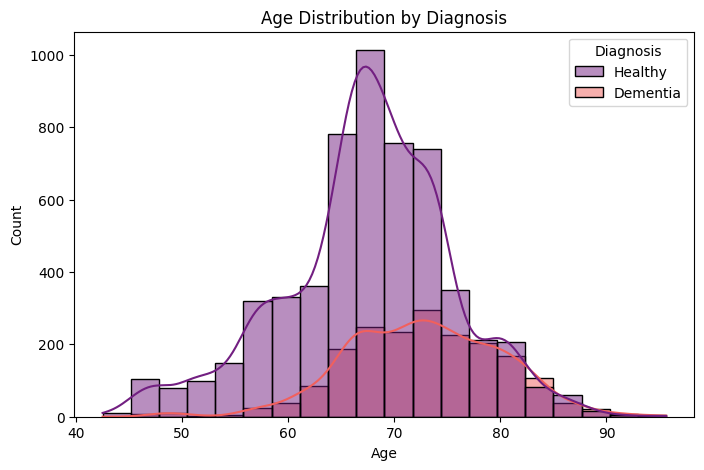

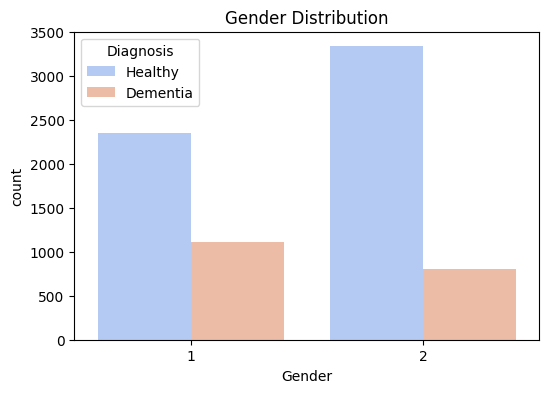

✅ Analysis Complete.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---
# Path to your Master CSV (or the 2 separate files if you need to merge again)
CSV_PATH = '/kaggle/working/OASIS3_Master_Clinical.csv' 
# If you haven't created the master yet, put the path to the clinical file you uploaded

print("📊 Loading Data for Analysis...")
df = pd.read_csv(CSV_PATH)

# --- CHECK FOR IMBALANCE (Requirement EP2) ---
# We need to know: Do we have enough Dementia patients?
print("\n--- Class Balance ---")
print(df['CDR'].value_counts())

# Create a simplified label for plotting
df['Diagnosis'] = df['CDR'].apply(lambda x: 'Dementia' if x >= 0.5 else 'Healthy')

# --- VISUALIZATION 1: Diagnosis Count (EP4) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Dataset Balance: Healthy vs Dementia')
plt.xlabel('Diagnosis Group')
plt.ylabel('Number of Patients')
plt.show()

# --- VISUALIZATION 2: Age vs. Diagnosis (EP4) ---
# Does age correlate with the disease? (Investigative Question)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Diagnosis', kde=True, bins=20, palette='magma')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age')
plt.show()

# --- VISUALIZATION 3: Gender Split ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Diagnosis', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

print("✅ Analysis Complete.")

In [3]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchio as tio
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [5]:
# --- CONFIGURATION ---
CSV_PATH = '/kaggle/working/OASIS3_Master_Clinical.csv'
# Ensure this points to where your images are (e.g., /kaggle/temp/mri_data or /kaggle/input/...)
MRI_ROOT = '/kaggle/input/oasis3-downloaded-data/oasis_data' 
# 1. Setup Device
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    GPU_COUNT = torch.cuda.device_count()
    print(f"🚀 {GPU_COUNT} GPUs Detected! Enabling Parallel Processing.")
    BATCH_SIZE = 16 * GPU_COUNT  # Scale batch size (16 per GPU -> 32 total)
else:
    DEVICE = torch.device("cpu")
    print("⚠️ No GPU detected. Running on CPU (Slow). Check Kaggle Settings!")
    BATCH_SIZE = 8

🚀 2 GPUs Detected! Enabling Parallel Processing.


# --- 1. DATASET CLASS ---

In [6]:
class NeuroClarityDataset(Dataset):
    def __init__(self, mri_root, csv_path):
        self.clinical_df = pd.read_csv(csv_path)
        self.data = []
        
        # Fast matching logic
        print("⏳ Matching images to clinical data...")
        # Get list of all IDs in CSV for fast lookup
        valid_ids = set(self.clinical_df['OASISID'].values)
        
        for root, dirs, files in os.walk(mri_root):
            for file in files:
                if file.endswith(".nii.gz"):
                    # Check if any valid ID is in the filename
                    for pid in valid_ids:
                        if pid in file:
                            row = self.clinical_df[self.clinical_df['OASISID'] == pid].iloc[0]
                            self.data.append({
                                'path': os.path.join(root, file),
                                'clinical': [row['Age']/100, 1 if row['Gender']=='F' else 0, row['MMSE']/30],
                                'label': 1 if row['CDR'] >= 0.5 else 0
                            })
                            break
                            
        print(f"✅ Found {len(self.data)} matched subjects.")
        self.transforms = tio.Compose([tio.RescaleIntensity((0, 1)), tio.Resize((64, 64, 32))])

    def __len__(self): return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        # Load Image
        subj = self.transforms(tio.Subject(mri=tio.ScalarImage(item['path'])))
        return (subj.mri.data, 
                torch.tensor(item['clinical'], dtype=torch.float32), 
                torch.tensor(item['label'], dtype=torch.long))


# --- 2. DEFINE MODELS ---

##  MODEL A: Baseline (Clinical Only)

In [7]:
class ClinicalBaseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 16), nn.ReLU(),
            nn.Linear(16, 16), nn.ReLU(),
            nn.Linear(16, 2)
        )
    def forward(self, img, clinical):
        return self.net(clinical) # Ignore image!

## MODEL B: NeuroClarity Fusion (Proposed)

In [8]:
class FusionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv3d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
            nn.Conv3d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
            nn.Conv3d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
            nn.Flatten()
        )
        self.cnn_fc = nn.Linear(16384, 64)
        self.mlp = nn.Sequential(nn.Linear(3, 16), nn.ReLU())
        self.fusion = nn.Sequential(
            nn.Linear(64+16, 32), nn.ReLU(), nn.Dropout(0.3), nn.Linear(32, 2)
        )
    def forward(self, img, clinical):
        x1 = self.cnn_fc(self.cnn(img))
        x2 = self.mlp(clinical)
        return self.fusion(torch.cat((x1, x2), dim=1))


# --- 3. TRAINING ENGINE ---

In [9]:
def train_and_evaluate(model, name, loader, epochs=5):
    print(f"\n🚀 Training {name}...")
    model = model.to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    criterion = nn.CrossEntropyLoss()
    
    # Train
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for img, clin, lbl in loader:
            img, clin, lbl = img.to(DEVICE), clin.to(DEVICE), lbl.to(DEVICE)
            optimizer.zero_grad()
            out = model(img, clin)
            loss = criterion(out, lbl)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"   Epoch {epoch+1}: Loss {total_loss/len(loader):.4f}")
        
    # Evaluate
    print(f"📊 Evaluating {name}...")
    model.eval()
    all_preds, all_labels = [], []
    correct = 0
    with torch.no_grad():
        for img, clin, lbl in loader:
            img, clin, lbl = img.to(DEVICE), clin.to(DEVICE), lbl.to(DEVICE)
            out = model(img, clin)
            _, pred = torch.max(out, 1)
            correct += (pred == lbl).sum().item()
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(lbl.cpu().numpy())
            
    acc = 100 * correct / len(loader.dataset)
    print(f"🏆 {name} Accuracy: {acc:.2f}%")
    return acc, all_preds, all_labels


# --- 4. EXECUTION ---

In [10]:
# Load Data
full_ds = NeuroClarityDataset(MRI_ROOT, CSV_PATH)
# Split 80/20
train_size = int(0.8 * len(full_ds))
test_size = len(full_ds) - train_size
train_ds, test_ds = torch.utils.data.random_split(full_ds, [train_size, test_size])

# ⚡ OPTIMIZED LOADERS FOR T4 x2
# num_workers=2 helps load data faster to keep GPUs busy
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)


print(f"📉 Training on {len(train_ds)} samples with Batch Size {BATCH_SIZE}...")
acc_base, preds_base, lbls_base = train_and_evaluate(ClinicalBaseline(), "Baseline", train_loader, epochs=10)
acc_fusion, preds_fusion, lbls_fusion = train_and_evaluate(FusionModel(), "Fusion Model", train_loader, epochs=10)

⏳ Matching images to clinical data...
✅ Found 590 matched subjects.
📉 Training on 472 samples with Batch Size 32...

🚀 Training Baseline...
   Epoch 1: Loss 0.8064
   Epoch 2: Loss 0.7967
   Epoch 3: Loss 0.7865
   Epoch 4: Loss 0.7768
   Epoch 5: Loss 0.7681
   Epoch 6: Loss 0.7588
   Epoch 7: Loss 0.7499
   Epoch 8: Loss 0.7409
   Epoch 9: Loss 0.7325
   Epoch 10: Loss 0.7241
📊 Evaluating Baseline...
🏆 Baseline Accuracy: 18.86%

🚀 Training Fusion Model...
   Epoch 1: Loss 0.5793
   Epoch 2: Loss 0.4932
   Epoch 3: Loss 0.5036
   Epoch 4: Loss 0.4992
   Epoch 5: Loss 0.5018
   Epoch 6: Loss 0.5091
   Epoch 7: Loss 0.4967
   Epoch 8: Loss 0.4918
   Epoch 9: Loss 0.4896
   Epoch 10: Loss 0.4845
📊 Evaluating Fusion Model...
🏆 Fusion Model Accuracy: 81.14%



📈 Generating Report Charts...


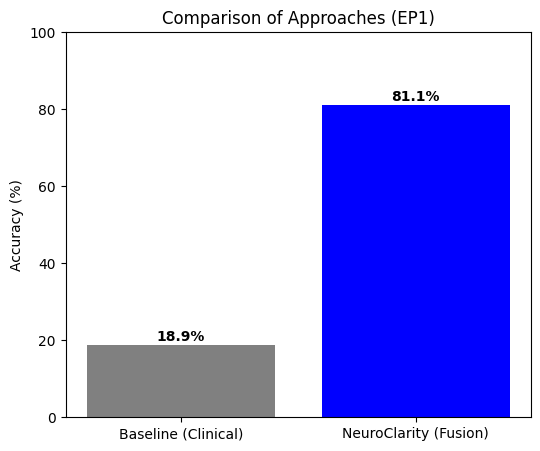

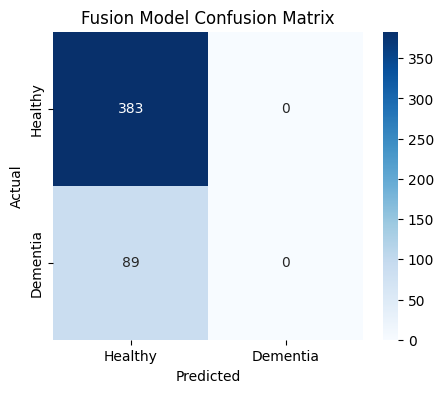


✅Complete!


In [11]:
# --- 5. VISUALIZE COMPARISON (EP1 & EP4) ---
print("\n📈 Generating Report Charts...")

# A. Accuracy Comparison Bar Chart
plt.figure(figsize=(6,5))
plt.bar(['Baseline (Clinical)', 'NeuroClarity (Fusion)'], [acc_base, acc_fusion], color=['gray', 'blue'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Approaches (EP1)')
plt.ylim(0, 100)
for i, v in enumerate([acc_base, acc_fusion]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

# B. Confusion Matrix for Fusion Model
cm = confusion_matrix(lbls_fusion, preds_fusion)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Dementia'], yticklabels=['Healthy', 'Dementia'])
plt.title('Fusion Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n✅Complete!")